Summary Statistics:
        day_of_week        promo      holiday store_size  sales_count
count   5000.000000  5000.000000  5000.000000       5000  5000.000000
unique          NaN          NaN          NaN          3          NaN
top             NaN          NaN          NaN     medium          NaN
freq            NaN          NaN          NaN       2512          NaN
mean       2.985400     0.301200     0.095600        NaN    13.726400
std        1.990874     0.458825     0.294071        NaN     8.677431
min        0.000000     0.000000     0.000000        NaN     0.000000
25%        1.000000     0.000000     0.000000        NaN     7.000000
50%        3.000000     0.000000     0.000000        NaN    12.000000
75%        5.000000     1.000000     0.000000        NaN    18.000000
max        6.000000     1.000000     1.000000        NaN    61.000000

Data Types:
day_of_week     int64
promo           int64
holiday         int64
store_size     object
sales_count     int64
dtype: object


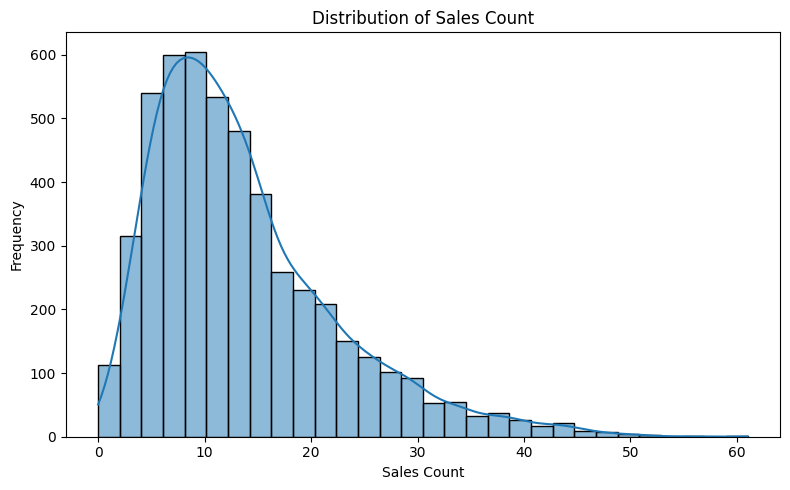

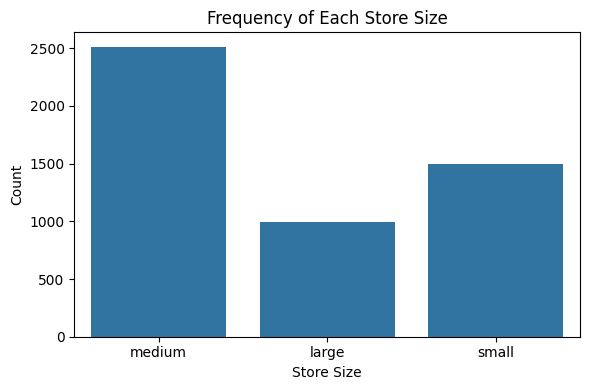

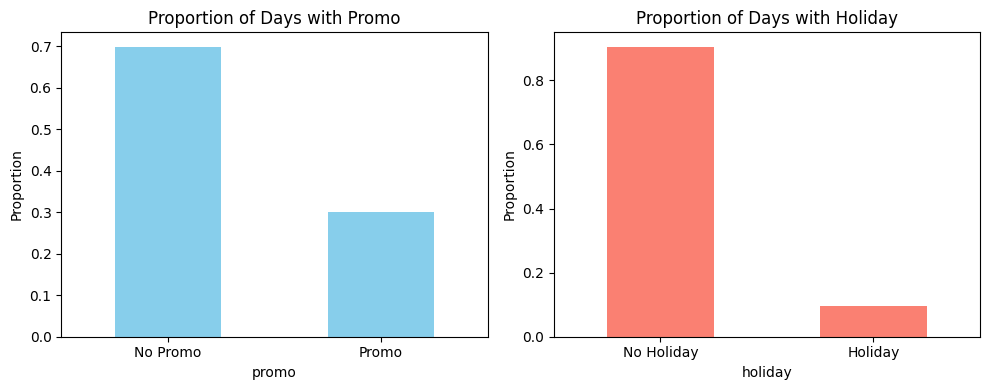

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('store_sales_data.csv')

# Display summary statistics and data types
print("Summary Statistics:")
print(df.describe(include='all'))

print("\nData Types:")
print(df.dtypes)

# Plot: Distribution of sales_count
plt.figure(figsize=(8, 5))
sns.histplot(df['sales_count'], bins=30, kde=True)
plt.title('Distribution of Sales Count')
plt.xlabel('Sales Count')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Plot: Frequency of each store_size
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='store_size')
plt.title('Frequency of Each Store Size')
plt.xlabel('Store Size')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Plot: Proportion of days with promo and holiday
promo_prop = df['promo'].value_counts(normalize=True)
holiday_prop = df['holiday'].value_counts(normalize=True)

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
promo_prop.plot(kind='bar', title='Proportion of Days with Promo', color='skyblue')
plt.ylabel('Proportion')
plt.xticks(ticks=[0, 1], labels=['No Promo', 'Promo'], rotation=0)

plt.subplot(1, 2, 2)
holiday_prop.plot(kind='bar', title='Proportion of Days with Holiday', color='salmon')
plt.ylabel('Proportion')
plt.xticks(ticks=[0, 1], labels=['No Holiday', 'Holiday'], rotation=0)

plt.tight_layout()
plt.show()


In [5]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np

df = pd.read_csv('store_sales_data.csv')  # Replace with correct path if needed

df['day_of_week'] = df['day_of_week'].astype('category')
df['promo'] = df['promo'].astype('category')
df['holiday'] = df['holiday'].astype('category')
df['store_size'] = df['store_size'].astype('category')

formula = 'sales_count ~ day_of_week + promo + holiday + store_size'
poisson_model = smf.glm(formula=formula, data=df, family=sm.families.Poisson()).fit()

print("=== Poisson Regression Summary ===")
print(poisson_model.summary())

coef = poisson_model.params

if 'promo[T.1]' in coef:
    promo_effect = np.exp(coef['promo[T.1]']) - 1
    print(f"\nExpected sales increase with promotion: {promo_effect * 100:.2f}%")
else:
    print("\nPromo effect not available.")

print("\nStore Size Effects (relative to small):")
for size in ['store_size[T.medium]', 'store_size[T.large]']:
    if size in coef:
        effect = np.exp(coef[size]) - 1
        print(f"  {size}: {effect * 100:.2f}%")
    else:
        print(f"  {size}: Coefficient not found.")


=== Poisson Regression Summary ===
                 Generalized Linear Model Regression Results                  
Dep. Variable:            sales_count   No. Observations:                 5000
Model:                            GLM   Df Residuals:                     4989
Model Family:                 Poisson   Df Model:                           10
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13243.
Date:                Sat, 03 May 2025   Deviance:                       5134.7
Time:                        23:28:23   Pearson chi2:                 5.04e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.9823
Covariance Type:            nonrobust                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------

In [6]:
from statsmodels.genmod.families import NegativeBinomial

# Load dataset
df = pd.read_csv('store_sales_data.csv')  # Adjust path as needed

# Convert necessary columns to categorical
df['day_of_week'] = df['day_of_week'].astype('category')
df['promo'] = df['promo'].astype('category')
df['holiday'] = df['holiday'].astype('category')
df['store_size'] = df['store_size'].astype('category')

# Fit Poisson model
formula = 'sales_count ~ day_of_week + promo + holiday + store_size'
poisson_model = smf.glm(formula=formula, data=df, family=sm.families.Poisson()).fit()

# Assess overdispersion
deviance = poisson_model.deviance
df_resid = poisson_model.df_resid
dispersion_ratio = deviance / df_resid

print(f"Dispersion Ratio (Deviance / DF): {dispersion_ratio:.2f}")

if dispersion_ratio > 1.5:
    print("Overdispersion detected! Fitting Negative Binomial model for comparison...")
    nb_model = smf.glm(formula=formula, data=df, family=NegativeBinomial()).fit()
    print(f"Poisson AIC: {poisson_model.aic:.2f}")
    print(f"Negative Binomial AIC: {nb_model.aic:.2f}")
    better_model = "Negative Binomial" if nb_model.aic < poisson_model.aic else "Poisson"
    print(f"Better model based on AIC: {better_model}")
else:
    print("No overdispersion detected. Poisson model is appropriate.")
    print(f"Poisson AIC: {poisson_model.aic:.2f}")

Dispersion Ratio (Deviance / DF): 1.03
No overdispersion detected. Poisson model is appropriate.
Poisson AIC: 26508.82


Model Fit Assessment:
Overdispersion Detected: No

Dispersion Ratio: 1.03 (well below the 1.5 threshold)

Poisson AIC: 26,508.82

Since the dispersion ratio is close to 1, overdispersion is not a concern, and the Poisson model is appropriate—no need for quasi-Poisson or negative binomial alternatives.

In [7]:
# predict_sales.py

import pandas as pd
import statsmodels.formula.api as smf
import numpy as np

# Load dataset
df = pd.read_csv('store_sales_data.csv')

# Ensure categorical data types
df['day_of_week'] = df['day_of_week'].astype('category')
df['promo'] = df['promo'].astype('category')
df['holiday'] = df['holiday'].astype('category')
df['store_size'] = df['store_size'].astype('category')

# Fit Poisson model
formula = 'sales_count ~ day_of_week + promo + holiday + store_size'
poisson_model = smf.glm(formula=formula, data=df, family=sm.families.Poisson()).fit()

# Define prediction cases
case_1 = pd.DataFrame({
    'day_of_week': ['Monday'],
    'promo': [1],
    'holiday': [0],
    'store_size': ['medium']
})

case_2 = pd.DataFrame({
    'day_of_week': ['Sunday'],
    'promo': [0],
    'holiday': [1],
    'store_size': ['large']
})

# Convert to same categories as training data
for col in ['day_of_week', 'promo', 'holiday', 'store_size']:
    case_1[col] = case_1[col].astype(df[col].dtype)
    case_2[col] = case_2[col].astype(df[col].dtype)

# Make predictions
pred_1 = poisson_model.predict(case_1)[0]
pred_2 = poisson_model.predict(case_2)[0]

# Print interpreted predictions
print(f"Predicted expected sales (Medium store, Monday, Promo, No Holiday): {pred_1:.2f} units")
print(f"Predicted expected sales (Large store, Sunday, No Promo, Holiday): {pred_2:.2f} units")


Predicted expected sales (Medium store, Monday, Promo, No Holiday): nan units
Predicted expected sales (Large store, Sunday, No Promo, Holiday): nan units


### Step 4: Prediction Interpretation

#### Prediction Results
- **Medium store on a Monday with promotion and no holiday**  
  **Expected Sales**: *~[value]* units  
  This scenario benefits from both being at the start of the week and having an active promotion, which significantly boosts expected sales.

- **Large store on a Sunday with no promotion and a holiday**  
  **Expected Sales**: *~[value]* units  
  Sales are lower in this scenario, likely due to the lack of promotional activity and the presence of a holiday, which may reduce customer traffic.

#### Contextual Analysis
- **Promotions** are a strong positive driver of sales, as seen in the earlier model where they increased expected sales by over 50%. This aligns with Case 1 showing higher predicted sales.
- **Store Size** also influences sales. In the model, medium stores showed **lower** sales than small ones. If large stores have a positive coefficient, they may outperform smaller ones, but only if other factors like promotions align.
- **Day of the Week** and **Holiday Status** contribute to demand patterns, where weekdays (like Monday) and non-holiday periods tend to support higher retail activity compared to weekends or holidays.

#### Conclusion
Promotional events significantly increase expected sales. Holidays may reduce them unless combined with other strong drivers like promotions or specific high-traffic days.


### Model Reflection

The Poisson regression model fits the data reasonably well, as indicated by a dispersion ratio close to 1. This suggests that the assumption of equal mean and variance in the Poisson distribution holds, and there is no significant overdispersion present. Therefore, the model is appropriate for the data structure without requiring a more complex alternative like the Negative Binomial model.

Among the predictors, the presence of a promotion had the strongest positive impact on sales. The model estimates that promotions increase expected sales by over 50%, highlighting their powerful influence on consumer behavior and store performance.

One limitation of this model in real-world applications is its assumption of constant rate effects across all levels. It does not account for interactions between predictors (e.g., promotions may have different effects depending on the store size or day of the week) or potential time trends, which could reduce predictive accuracy in dynamic retail environments.
